#Assignment 4
##Aditi Shukla(21BCE2156)

In [ ]:
import pandas as pd

# Load the datasets
red_wine_data = pd.read_csv("/content/winequality-red.csv")



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

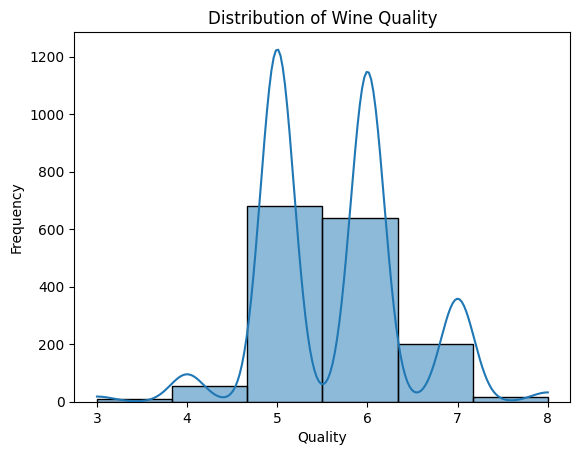

In [ ]:
# Initial data exploration
print(red_wine_data.head())
print(red_wine_data.info())
print(red_wine_data.describe())

# Check for missing values
print(red_wine_data.isnull().sum())

# Data distribution visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=red_wine_data, x="quality", bins=6, kde=True)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Handle missing values (example: drop rows with missing values)
red_wine_data.dropna(inplace=True)

# Outlier detection and treatment (example: using z-scores)
from scipy import stats
z_scores = stats.zscore(red_wine_data)
red_wine_data = red_wine_data[(z_scores < 3).all(axis=1)]


In [ ]:
# Select relevant features
selected_features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
X = red_wine_data[selected_features]
y = red_wine_data["quality"]

# Feature scaling (example: Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


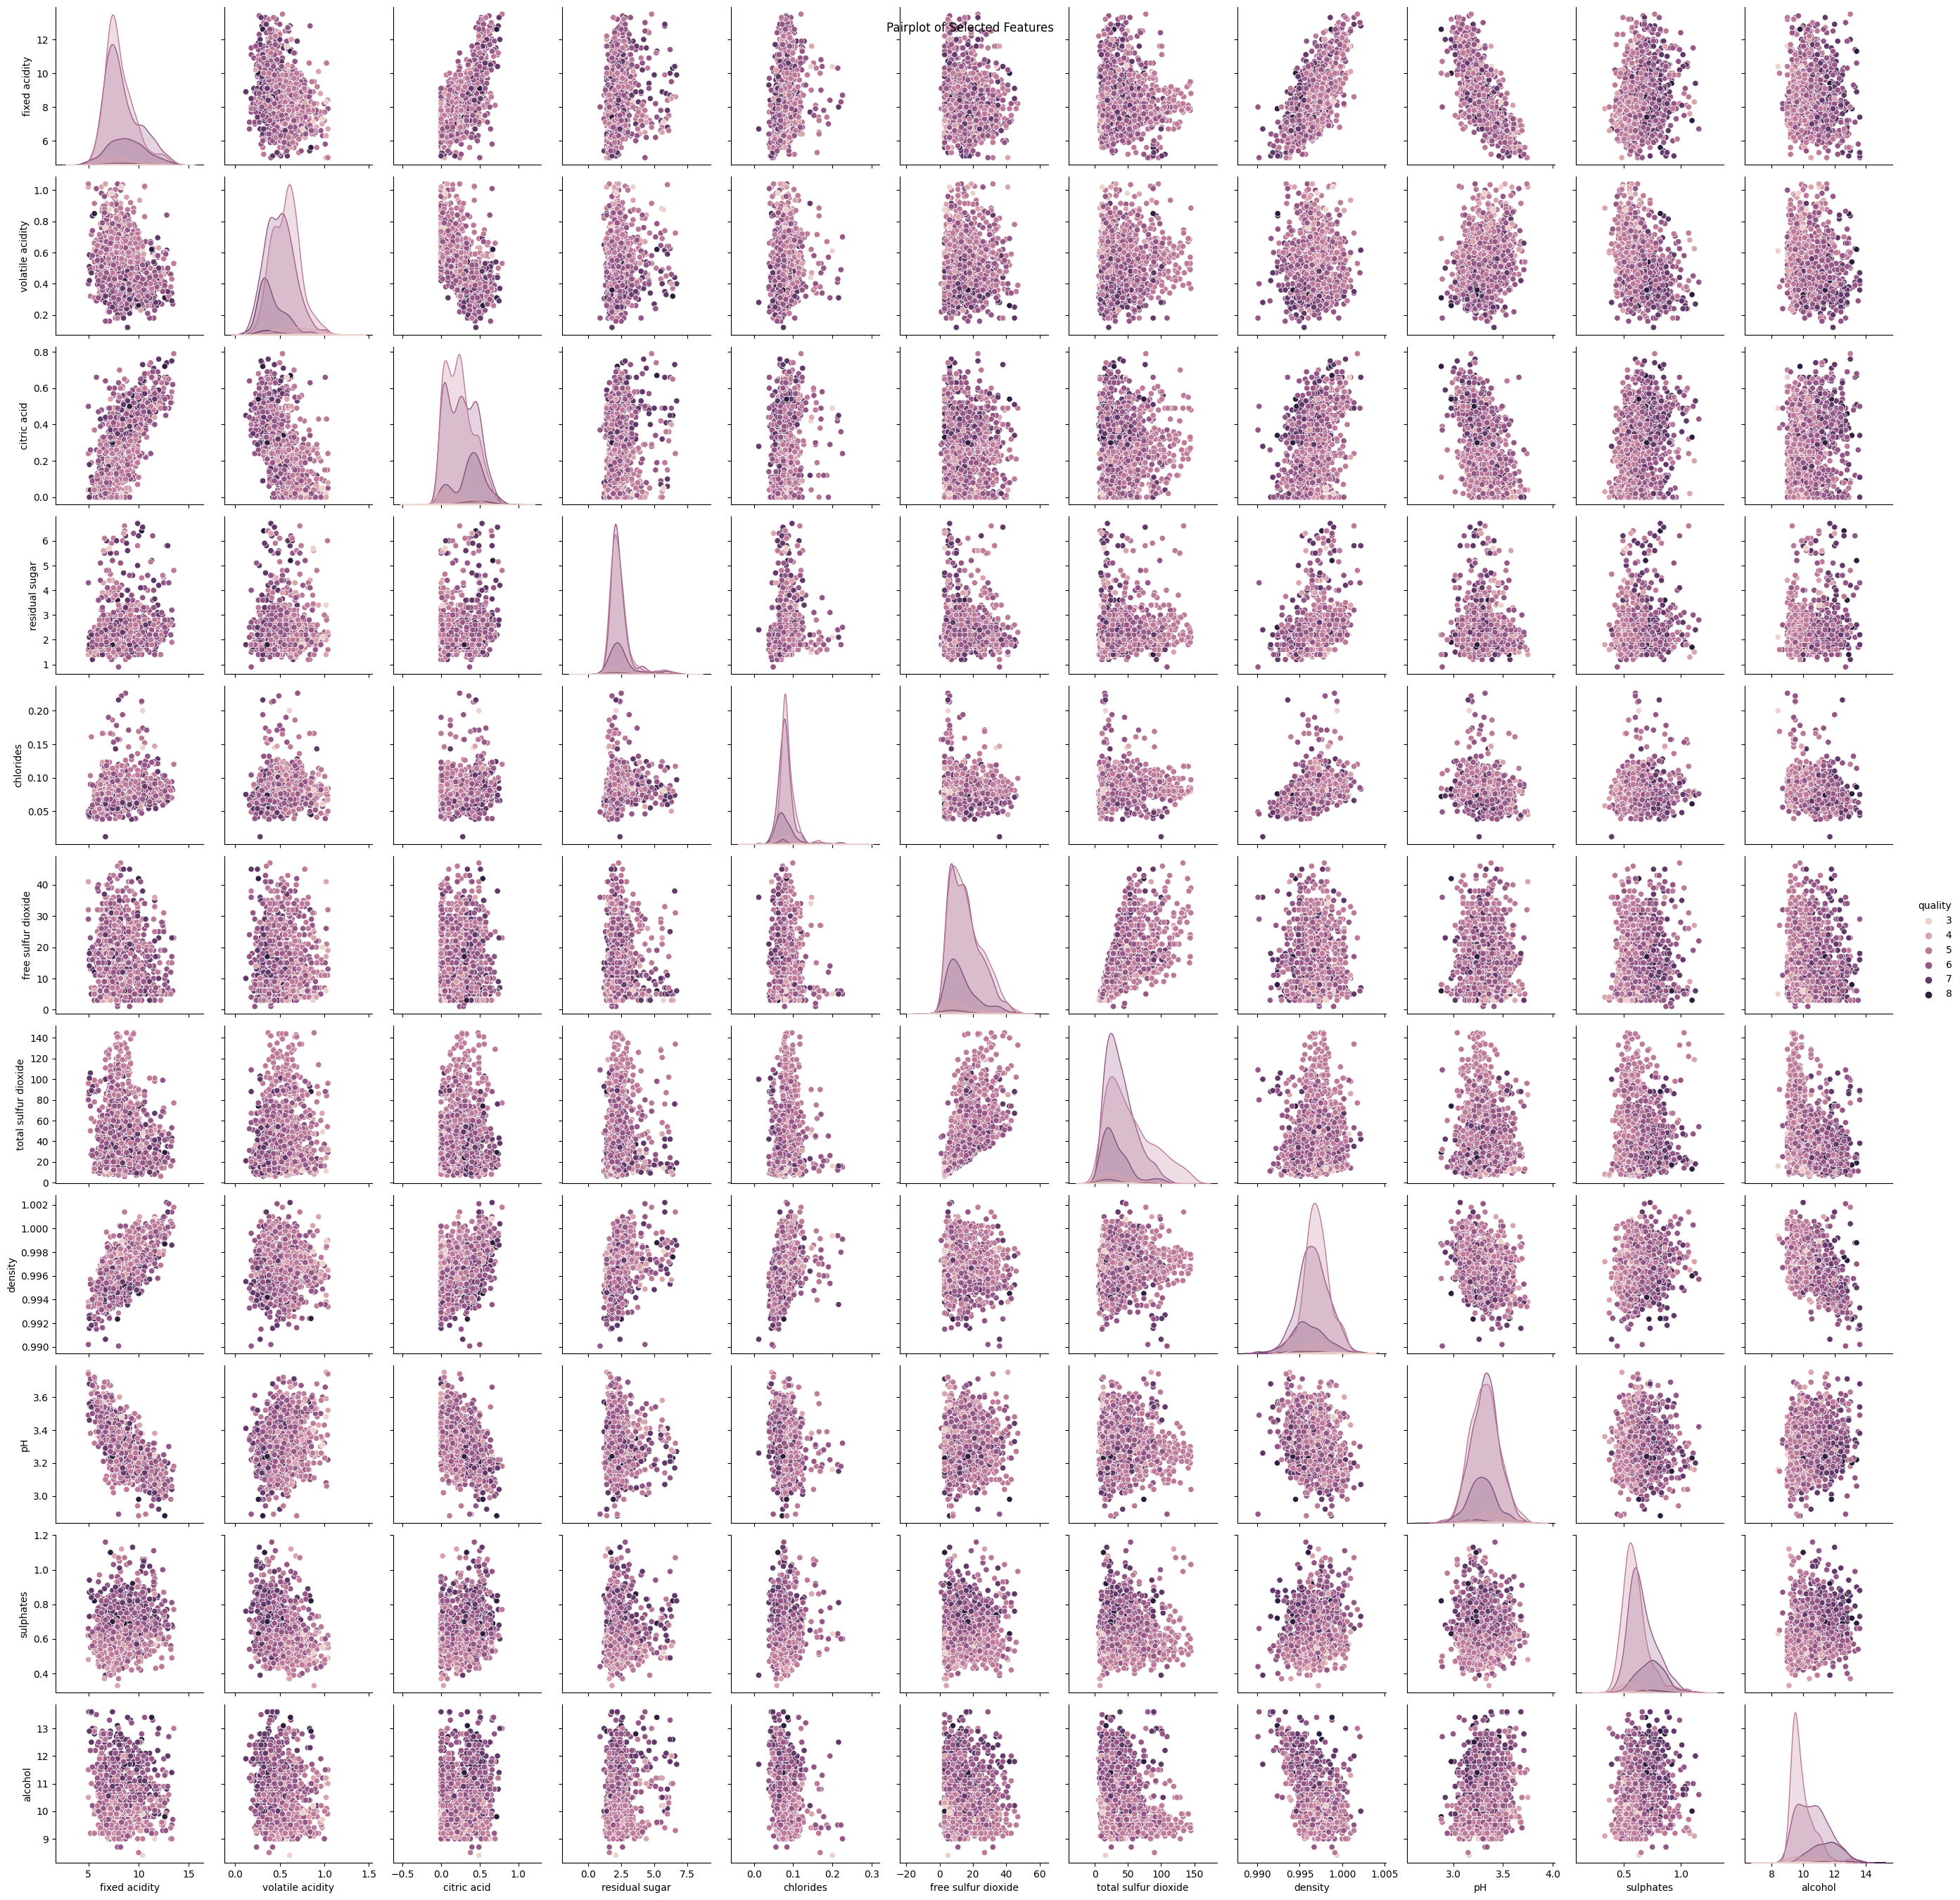

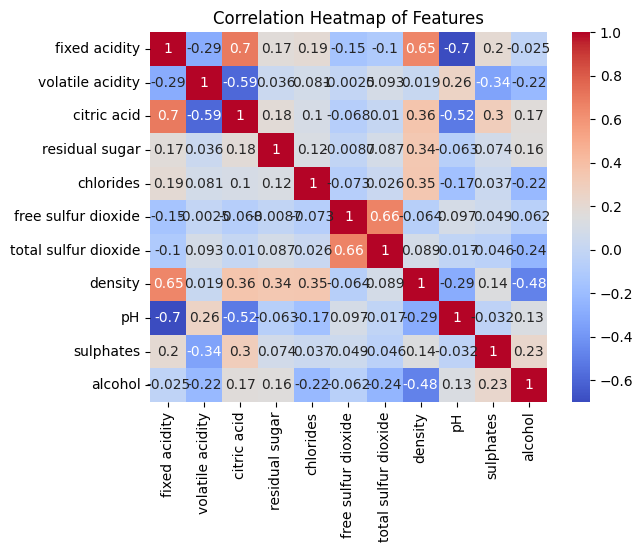

In [ ]:
# Pairplot for feature relationships
sns.pairplot(red_wine_data, vars=selected_features, hue="quality")
plt.suptitle("Pairplot of Selected Features")
plt.show()

# Correlation heatmap
correlation_matrix = red_wine_data[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Example: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R-squared: {r2}")


Linear Regression MSE: 0.40741026314559886
Linear Regression R-squared: 0.3506894203990175


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Grid Search for Random Forest hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Tuned Random Forest MSE: {mse}")
print(f"Tuned Random Forest R-squared: {r2}")


Tuned Random Forest MSE: 0.3263510702408792
Tuned Random Forest R-squared: 0.4798776031428129


In [ ]:
# Example: Testing the best model with random observations
random_observation = X_scaled[0].reshape(1, -1)  # Replace with your own random data point
predicted_quality = best_rf_model.predict(random_observation)
print(f"Predicted Wine Quality: {predicted_quality[0]}")


Predicted Wine Quality: 5.057595238095239


In [ ]:
import joblib

# Save the best model to a file
joblib.dump(best_rf_model, 'wine_quality_model.pkl')


['wine_quality_model.pkl']

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have trained a model and made predictions (e.g., using Linear Regression)
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.40741026314559886
Root Mean Squared Error (RMSE): 0.638286975541252
R-squared (R2): 0.3506894203990175


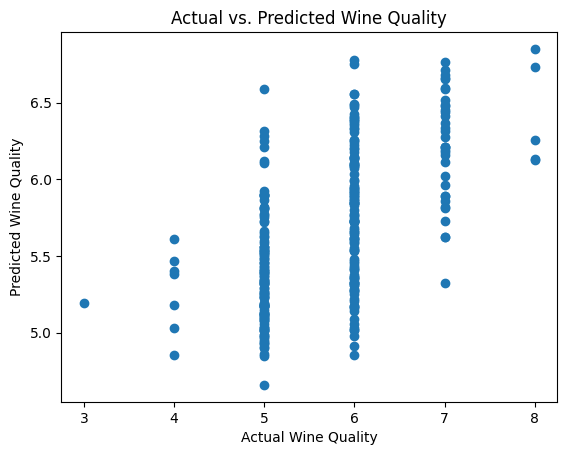

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs. Predicted Wine Quality")
plt.show()


In [ ]:
# Example: Creating a random observation
import numpy as np

random_observation = np.array([7.0, 0.25, 0.30, 3.0, 0.045, 15.0, 60.0, 0.9900, 3.20, 0.50, 11.0]).reshape(1, -1)


In [ ]:
# Use the trained model to make predictions
predicted_quality = lr_model.predict(random_observation)


In [ ]:
print(f"Predicted Wine Quality: {predicted_quality[0]}")


Predicted Wine Quality: -5.7638676024257
